In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/RNN")

In [0]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.layers import LSTM, Input, Dense
from keras.models import Model
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [0]:
#Hyper and Dynamic params
length_batches = 7 #Days

n_lstm = 256
EPOCHS = 300
BS = 256

In [0]:
# Import required data
data_path = "."
data = pd.read_csv(os.path.join(data_path, "all_stocks_5yr.csv"))
cl = data[data["Name"] == "MMM"].Close.values

In [12]:
# Normalize dataset
scaler = MinMaxScaler()

cl = cl.reshape(cl.shape[0], 1)
cl = scaler.fit_transform(cl)
cl

array([[0.0403808 ],
       [0.03958747],
       [0.04149147],
       ...,
       [0.94541848],
       [0.94343514],
       [0.9414518 ]])

In [0]:
#Create a function to process the data into 7 day look back slices
def create_batches(data, length):
  x, y = [], []
  for i in range(len(data) - length -1):
    x.append(data[i: i+length, 0])
    y.append(data[i+length, 0])
  return np.array(x), np.array(y)

In [17]:
#Create batches and Show some of them
x, y = create_batches(cl, length_batches)
for i in range(5): # show 5 number of batches
  print(x[i], ">>>", y[i])

[0.0403808  0.03958747 0.04149147 0.0510115  0.05497818 0.05220151
 0.04680682] >>> 0.042602142007140076
[0.03958747 0.04149147 0.0510115  0.05497818 0.05220151 0.04680682
 0.04260214] >>> 0.03704879016263385
[0.04149147 0.0510115  0.05497818 0.05220151 0.04680682 0.04260214
 0.03704879] >>> 0.04379214597381986
[0.0510115  0.05497818 0.05220151 0.04680682 0.04260214 0.03704879
 0.04379215] >>> 0.041888139627132115
[0.05497818 0.05220151 0.04680682 0.04260214 0.03704879 0.04379215
 0.04188814] >>> 0.03958746529155088


In [20]:
#Split dataset into train and test portions
x_train, x_test = x[:int(x.shape[0] * 0.80)], x[int(x.shape[0] * 0.80):]
y_train, y_test = y[:int(y.shape[0] * 0.80)], y[int(x.shape[0] * 0.80):]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 7)
(250, 7)
(1000,)
(250,)


In [21]:
#Turn data into batches with features representation
x_train = np.expand_dims(x_train, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 7, 1)
(250, 7, 1)
(1000,)
(250,)



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (InputLayer)          (None, 7, 1)              0         
_________________________________________________________________
LSTM (LSTM)                  (None, 256)               264192    
_________________________________________________________________
outputs (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


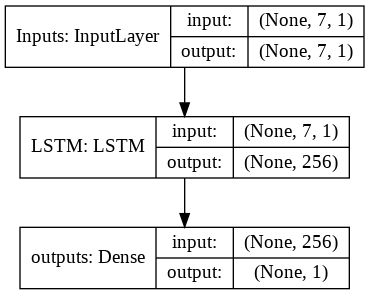

In [26]:
#Construct model and plot and summarize it
inputs = Input(shape = (7, 1), name = "Inputs")

x = inputs
x = LSTM(units=n_lstm, name = "LSTM")(x)
outputs = Dense(1, name="outputs")(x)

model = Model(inputs, outputs, name="model")
model.compile(optimizer = "adam", loss = "mse")
model.summary()

plot_model(model, to_file = "model.png", show_shapes = True)

In [41]:
# Fit model

history = model.fit(x_train,
                    y_train,
                    epochs=EPOCHS,
                    validation_data = [x_test, y_test],
                    shuffle=False,
                    batch_size=BS)

Train on 1000 samples, validate on 250 samples
Epoch 1/300
1000/1000 [==============================] - 0s 103us/step - loss: 3.5747e-04 - val_loss: 1.3973e-04
Epoch 2/300
1000/1000 [==============================] - 0s 93us/step - loss: 2.4488e-04 - val_loss: 2.2813e-04
Epoch 3/300
1000/1000 [==============================] - 0s 96us/step - loss: 1.6318e-04 - val_loss: 1.8673e-04
Epoch 4/300
1000/1000 [==============================] - 0s 102us/step - loss: 1.5474e-04 - val_loss: 4.0357e-04
Epoch 5/300
1000/1000 [==============================] - 0s 102us/step - loss: 1.2647e-04 - val_loss: 2.1581e-04
Epoch 6/300
1000/1000 [==============================] - 0s 95us/step - loss: 1.4118e-04 - val_loss: 2.1982e-04
Epoch 7/300
1000/1000 [==============================] - 0s 97us/step - loss: 1.3928e-04 - val_loss: 3.7257e-04
Epoch 8/300
1000/1000 [==============================] - 0s 98us/step - loss: 1.3552e-04 - val_loss: 3.0383e-04
Epoch 9/300
1000/1000 [==============================]

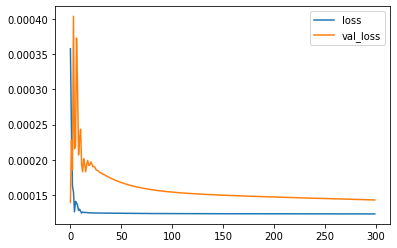

In [42]:
#Plot logs
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

(250, 1)


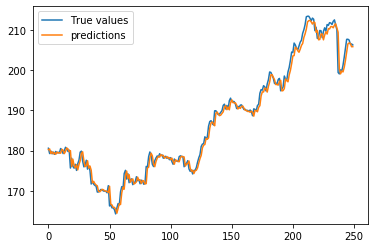

In [44]:
#Test
predictions = model.predict(x_test)
print(predictions.shape)

plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label = "True values")
plt.plot(scaler.inverse_transform(predictions), label = "predictions")

plt.legend()
plt.show()